In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cProfile import label
from numpy import angle


pd.set_option("display.max_columns", None)
df = pd.read_csv("../data/processed/fpl/2015-16/player_master_table.csv")
df = df[(df["minutes"] > 0) & (df["starts"] > 0)]


In [120]:
if "team_name" in df.columns:
    arsenal_df = df[df["team_name"] == "Man Utd"]
    display(arsenal_df.head())

    # drop rows of players with 0 minutes or 0 starts
    arsenal_df = arsenal_df[(arsenal_df["minutes"] > 0) & (arsenal_df["starts"] > 0)]
else:
    arsenal_df = pd.DataFrame()  # fallback to empty DataFrame if not present



,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,removed,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,region,team_join_date,birth_date,has_temporary_code,opta_code,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,mng_win,mng_draw,mng_loss,mng_underdog_win,mng_underdog_draw,mng_clean_sheets,mng_goals_scored,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,team_id,team_name,position
521,True,False,100.0,100.0,493250,0,0,3,-3,3,3,2.2,0.0,13,Amad,0.0,364,False,NaN,2025-02-15T18:30:08.930349Z,53,493250.jpg,5.0,False,Diallo,4.1,False,NaN,a,14,1,129,3991127,0,4001407,0,0.0,24.3,Amad,54.0,2021-01-07,2002-07-11,False,p493250,1898,8,8,7,30,0,0,0,5,0,0,17,569,634.0,687.2,615.0,193.8,20,4.71,3.98,8.69,31.71,0,0,0,0,0,0,0,77,26,39,33,49,30,38,30,3.0,NaN,NaN,NaN,NaN,NaN,0.22,0.0,0.19,0.41,1.50,1.42,155,93,661,258,12,7,94,29,0.95,0.33,14,Man Utd,Midfielder
523,True,False,100.0,100.0,141746,0,0,-1,1,3,3,1.8,0.0,7,Bruno,0.0,366,False,NaN,2024-12-27T00:30:09.652602Z,84,141746.jpg,4.8,False,Borges Fernandes,13.7,False,NaN,a,14,1,174,4812923,0,5343496,0,0.0,20.7,B.Fernandes,173.0,2020-01-30,1994-09-08,False,p141746,3017,8,12,10,47,0,0,0,3,2,0,28,810,1017.8,1407.7,587.0,300.8,35,9.93,7.89,17.82,45.85,0,0,0,0,0,0,0,8,4,1,1,51,32,4,4,1.0,NaN,1.0,NaN,1.0,NaN,0.30,0.0,0.24,0.54,1.37,1.40,10,7,795,341,14,8,29,10,1.04,0.30,14,Man Utd,Midfielder
524,True,False,100.0,100.0,451302,0,0,-2,2,0,1,0.5,0.0,6,Altay,0.0,367,False,NaN,2025-02-14T14:30:08.406927Z,43,451302.jpg,2.0,False,Bayindir,0.1,False,NaN,a,14,1,8,13115,0,17199,0,0.0,1.9,Bayindir,219.0,2023-09-01,1998-04-14,False,p451302,360,0,0,1,10,0,0,0,0,0,8,0,22,80.0,0.0,0.0,7.9,4,0.00,0.00,0.00,6.93,0,0,0,0,0,0,0,415,35,659,74,628,58,458,35,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.0,0.00,0.00,1.73,2.50,584,28,234,56,292,37,446,61,1.00,0.25,14,Man Utd,Goalkeeper
525,True,False,100.0,100.0,61256,0,0,-4,4,1,3,1.0,0.0,2,Carlos Henrique,0.0,368,False,NaN,2024-11-10T23:00:08.039181Z,46,61256.jpg,2.0,False,Casimiro,0.4,False,NaN,a,14,1,48,130546,0,162297,0,0.0,10.4,Casemiro,30.0,2022-08-22,1992-02-23,False,p61256,1489,1,0,6,20,0,0,0,5,0,0,3,300,433.2,348.2,265.0,104.8,18,1.80,1.99,3.79,24.00,0,0,0,0,0,0,0,165,67,117,83,126,83,143,82,NaN,NaN,NaN,NaN,NaN,NaN,0.11,0.0,0.12,0.23,1.45,1.21,346,225,445,117,296,130,273,83,1.09,0.36,14,Man Utd,Midfielder
526,True,False,100.0,100.0,216051,0,0,0,0,3,2,0.0,0.0,1,Diogo,0.0,369,False,NaN,2025-04-25T13:30:08.377875Z,50,216051.jpg,2.9,False,Dalot Teixeira,4.7,False,NaN,a,14,1,95,1487754,0,1919171,0,0.0,19.0,Dalot,173.0,2018-06-08,1999-03-18,False,p216051,2812,0,4,8,45,0,0,0,5,0,0,9,352,493.2,434.2,264.0,118.6,31,1.96,2.35,4.31,46.95,0,0,0,0,0,0,0,146,56,89,16,129,14,118,26,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.0,0.08,0.14,1.50,1.44,209,26,586,242,154,42,80,27,0.99,0.26,14,Man Utd,Defender


In [121]:
if "goals_scored" in arsenal_df.columns:
    goal_scorer = (
        arsenal_df[arsenal_df["goals_scored"] > 0]
        .sort_values("total_points", ascending=False)
        [["web_name", "position", "goals_scored", "assists", "clean_sheets", "total_points", "starts"]]
    )

    display(goal_scorer)

,web_name,position,goals_scored,assists,clean_sheets,total_points,starts
523,B.Fernandes,Midfielder,8,12,10,174,35
521,Amad,Midfielder,8,8,7,129,20
529,Garnacho,Midfielder,6,4,5,106,23
532,Højlund,Forward,4,1,6,78,23
537,Martinez,Defender,2,1,6,68,20
545,De Ligt,Defender,2,0,4,68,25
543,Zirkzee,Forward,3,2,3,64,14
549,Ugarte,Midfielder,1,2,4,49,22
525,Casemiro,Midfielder,1,0,6,48,18
534,Maguire,Defender,1,0,3,48,19


C:\Users\oukan\AppData\Local\Temp\ipykernel_27312\2330098787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ppg_per_team, x="points_per_game", y="web_name", ax=ax, palette="viridis")


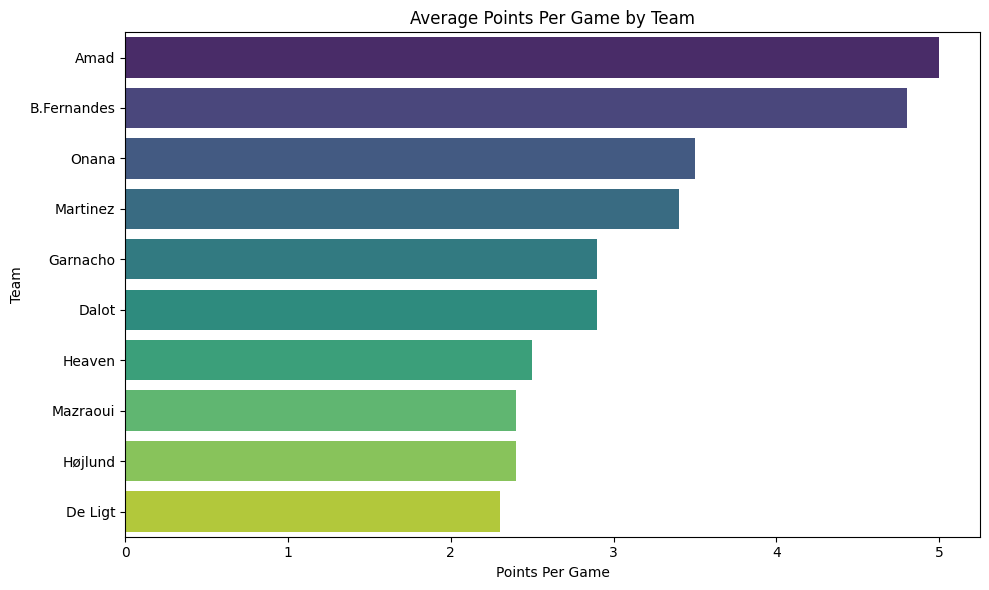

In [122]:
# Team points per game
ppg_per_team = arsenal_df.groupby("web_name")["points_per_game"].mean().sort_values(ascending=False).reset_index().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ppg_per_team, x="points_per_game", y="web_name", ax=ax, palette="viridis")
ax.set_title("Average Points Per Game by Team")
ax.set_xlabel("Points Per Game")
ax.set_ylabel("Team")
plt.tight_layout()
plt.show()

C:\Users\oukan\AppData\Local\Temp\ipykernel_27312\735728959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ppg_per_team, y="points_per_game", x="team_name", ax=ax, palette="viridis")


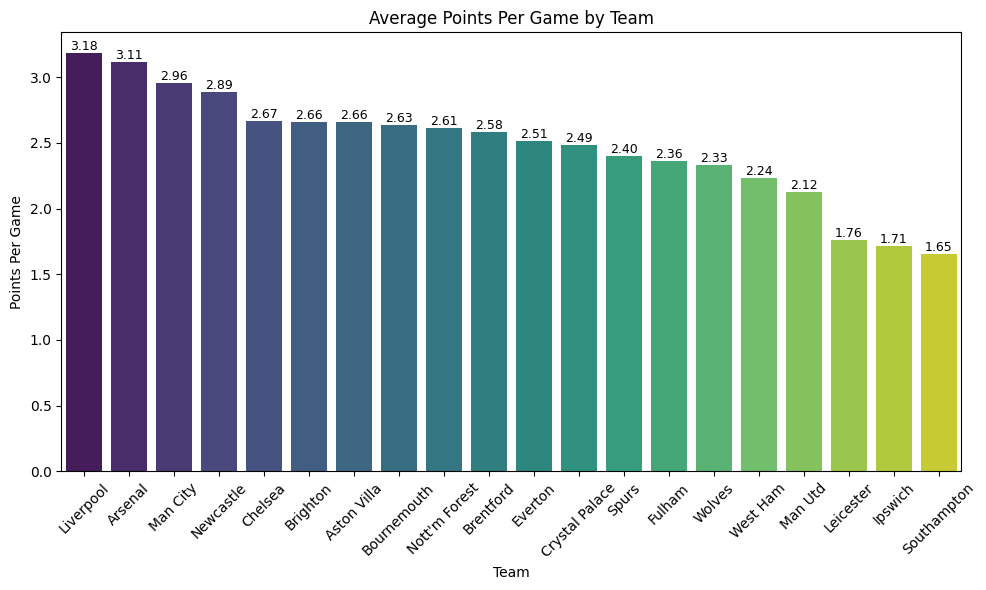

In [123]:
# Team points per game



ppg_per_team = df.groupby("team_name")["points_per_game"].mean().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ppg_per_team, y="points_per_game", x="team_name", ax=ax, palette="viridis")
ax.set_title("Average Points Per Game by Team")
ax.set_ylabel("Points Per Game")
ax.set_xlabel("Team")
plt.xticks(rotation=45)
# label each bar with its value
for patch in ax.patches:
	value = patch.get_height()
	ax.annotate(f"{value:.2f}", 
				(patch.get_x() + patch.get_width() / 2, value), 
				ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\oukan\AppData\Local\Temp\ipykernel_27312\3496970398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ppg_per_team, y="points_per_game", x="position", ax=ax, palette="viridis")


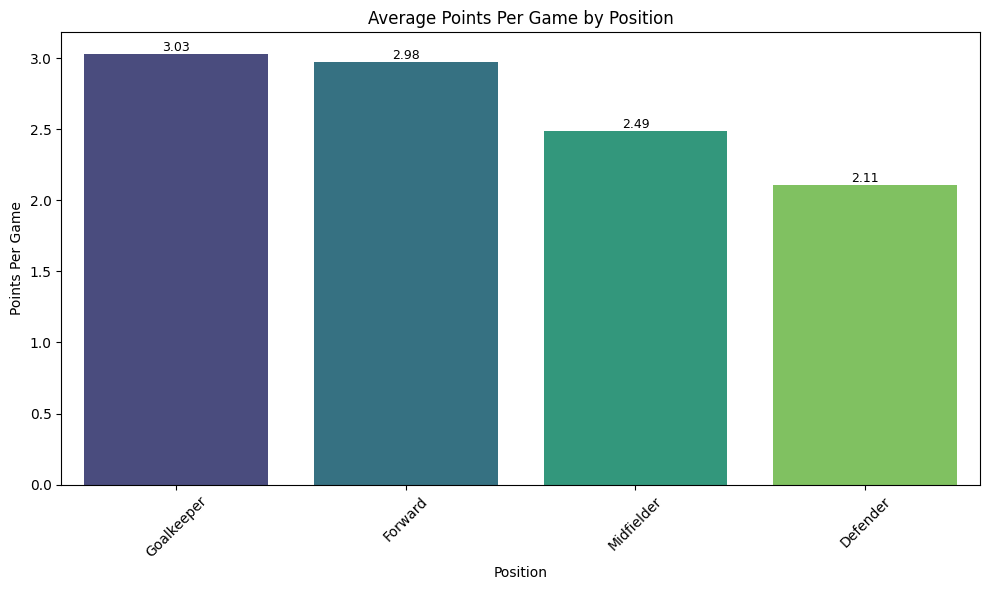

In [124]:
# Team points per game
ppg_per_team = df.groupby("position")["points_per_game"].mean().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ppg_per_team, y="points_per_game", x="position", ax=ax, palette="viridis")
ax.set_title("Average Points Per Game by Position")
ax.set_ylabel("Points Per Game")
ax.set_xlabel("Position")
plt.xticks(rotation=45)
# label each bar with its value
for patch in ax.patches:
	value = patch.get_height()
	ax.annotate(f"{value:.2f}", 
				(patch.get_x() + patch.get_width() / 2, value), 
				ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()